# 1. 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [ ]:
data_2201 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202201.csv', index_col = False)
data_2202 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202202.csv', index_col = False)
data_2203 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202203.csv', index_col = False)
data_2204 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202204.csv', index_col = False)
data_2205 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202205.csv', index_col = False)
data_2206 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202206.csv', index_col = False)
data_2207 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202207.csv', index_col = False)
data_2208 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202208.csv', index_col = False)
data_2209 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202209.csv', index_col = False)
data_2210 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202210.csv', index_col = False)
data_2211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202211.csv', index_col = False)
data_2212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202212.csv', index_col = False)
# 1시간 단위 행정동 별 생활인구 1년치 데이터

In [ ]:
data_list = [data_2201,data_2202,data_2203,data_2204,data_2205,data_2206,data_2207,data_2208,data_2209,data_2210,data_2211,data_2212]

In [ ]:
#여러개의 데이터프레임 하나로 합치기기
data_22 = pd.concat(data_list, axis = 0)
data_22.reset_index(inplace = True , drop = True)

data_22 = pd.DataFrame(data_22)

In [ ]:
data_22

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20220101,0,11200550,15915.9153,255.4393,116.4503,356.6989,1515.4383,1407.4535,639.5899,...,1138.1167,506.7359,572.9357,342.8503,546.2349,393.6438,400.2660,414.5880,299.1094,871.5197
1,20220101,0,11320515,20067.0536,761.0144,364.8200,549.2125,597.7672,650.3921,666.1416,...,761.3329,684.2883,771.4230,752.9131,820.4530,782.0723,951.6618,914.5524,636.0850,1497.8745
2,20220101,0,11740590,13131.7376,814.6533,380.7626,444.0055,297.3462,341.0619,296.3934,...,314.2245,357.4321,615.6579,598.9586,610.3032,533.1886,436.0663,463.4412,284.7736,714.1822
3,20220101,0,11710642,27802.6396,536.2982,235.3147,509.3444,1001.5843,1363.8527,1721.8997,...,1475.7207,1726.6845,1671.2855,1286.8066,1070.2619,832.3977,783.1949,810.2889,549.8354,1327.1990
4,20220101,0,11470580,14398.2868,573.7967,294.0708,353.9354,357.5041,483.9943,525.4139,...,567.7996,458.1889,529.2853,502.2692,544.1017,485.4408,654.0012,600.3047,431.7909,1005.2701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714235,20221231,23,11740550,26849.5654,2351.0068,1214.8337,937.6079,456.3894,498.5714,472.1622,...,513.0224,561.7293,1099.6503,1217.8158,1274.9191,851.5014,816.0413,778.8732,640.6550,1236.6337
3714236,20221231,23,11590540,20025.0040,1031.9551,378.5519,384.2442,613.5671,790.2585,713.5261,...,746.3391,713.8543,1026.2784,819.3403,749.9114,689.6776,820.0387,676.9692,602.1882,1293.3497
3714237,20221231,23,11470630,16125.0930,526.2720,583.5859,839.0280,368.6007,365.4509,305.8051,...,359.1490,348.7186,485.3043,775.2054,876.9643,721.4776,639.9144,509.0424,404.5792,937.8374
3714238,20221231,23,11710540,14964.0371,658.0712,375.2026,330.4875,294.3431,351.6816,401.5746,...,372.0913,415.5257,593.9416,580.5089,608.0485,651.5841,633.4928,609.3532,509.4529,1173.0780


In [ ]:
data_22_gr = data_22[data_22['행정동코드']==11305535 ]
# 개별 행정동 데이터 추출

In [ ]:
data_22_gr_ = data_22_gr
data_22_gr_

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
295,20220101,0,11305535,21009.4757,392.0636,262.9869,419.0573,795.5370,891.6959,688.8383,...,895.4358,632.7947,707.0731,536.1652,778.1056,832.6464,1012.5098,850.5806,753.8108,2002.4265
598,20220101,1,11305535,20364.9769,404.5079,271.3349,407.0984,759.1762,872.0068,676.1915,...,898.1238,632.5021,672.5011,504.5344,747.0769,765.8386,989.2474,778.5579,698.0797,1946.4827
1252,20220101,2,11305535,20347.1077,397.7781,266.8197,410.3285,753.9758,898.2908,682.2993,...,888.1057,648.4554,665.2551,510.3161,728.2020,771.9031,959.2724,777.3097,685.4833,1947.5324
1323,20220101,3,11305535,20360.8512,413.3475,277.2641,407.9424,748.4042,889.3018,665.4473,...,906.9513,640.3178,669.2915,513.5474,722.1008,758.1028,964.9098,791.9194,674.3739,1948.9346
1742,20220101,4,11305535,20399.8000,402.9838,270.3119,431.9831,750.9239,922.1191,663.4354,...,898.3755,653.3711,677.8110,490.3707,741.2234,755.8430,987.0271,792.6009,673.4555,1935.5035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712461,20221231,19,11305535,24183.3136,520.8885,349.3998,505.6879,750.7123,1128.3544,737.1094,...,915.9680,718.2199,697.5830,670.2988,925.6726,936.2950,1183.8076,950.6633,865.0518,2141.9517
3712569,20221231,20,11305535,23838.8460,473.3394,317.5048,485.7731,740.5482,1104.3377,725.6371,...,890.1562,689.5917,766.1551,694.2402,899.9700,920.2579,1198.1300,951.0041,859.5785,2121.3507
3712988,20221231,21,11305535,23898.5066,499.4320,335.0068,488.9539,704.2341,1114.1959,788.9146,...,924.1113,685.5533,746.6339,654.8413,869.2530,955.3356,1186.4306,974.0585,878.6775,2079.1357
3713407,20221231,22,11305535,23873.3753,437.2450,293.2936,488.3179,720.6326,1144.6928,776.8756,...,985.0813,732.3078,781.4464,648.5536,887.5948,953.8837,1169.9449,978.2037,873.8890,2116.4264


In [ ]:
data_22_gr = data_22_gr[['기준일ID', '시간대구분', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자70세이상생활인구수']]

data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']



<ipython-input-121-0160ed5650cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


In [ ]:
data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']

columns_to_drop = ['여자60세부터64세생활인구수','여자65세부터69세생활인구수','남자60세부터64세생활인구수','남자65세부터69세생활인구수','남자70세이상생활인구수','여자70세이상생활인구수']

<ipython-input-122-4ccd9b762ae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


In [ ]:
data_22_gr

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
295,20220101,0,850.5806,753.8108,738.9050,493.7125,1282.2980,2002.4265,6121.7334
598,20220101,1,778.5579,698.0797,744.4155,481.5033,1254.0837,1946.4827,5903.1228
1252,20220101,2,777.3097,685.4833,749.4362,474.7638,1269.4604,1947.5324,5903.9858
1323,20220101,3,791.9194,674.3739,746.0822,472.9704,1257.6221,1948.9346,5891.9026
1742,20220101,4,792.6009,673.4555,728.1061,474.9919,1235.2699,1935.5035,5839.9278
...,...,...,...,...,...,...,...,...,...
3712461,20221231,19,950.6633,865.0518,906.6329,696.8077,1377.0242,2141.9517,6938.1316
3712569,20221231,20,951.0041,859.5785,897.0431,671.3787,1312.3144,2121.3507,6812.6695
3712988,20221231,21,974.0585,878.6775,928.0663,657.6481,1333.4231,2079.1357,6851.0092
3713407,20221231,22,978.2037,873.8890,908.5326,677.3126,1265.7318,2116.4264,6820.0961


In [ ]:
data_22_gr = pd.DataFrame(data_22_gr)

# 기준일ID와 시간대구분을 기준으로 피벗 테이블 생성
pivot_22_gr = data_22_gr.pivot(index='기준일ID', columns='시간대구분', values='60세이상생활인구수')

In [ ]:
pivot_22_gr

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,6121.7334,5903.1228,5903.9858,5891.9026,5839.9278,5908.1771,5968.4860,5998.2732,5942.5830,5948.0740,...,6177.1096,6425.7266,6589.7944,6645.6609,6470.2319,6355.8344,6206.9168,6125.9627,6106.1250,5758.7526
20220102,5779.2440,5741.8950,5759.8520,5804.8893,5755.7762,5842.4599,5851.3631,5851.2187,6000.3722,6157.8937,...,6423.3536,6502.3814,6683.8036,6693.9626,6698.7161,6375.2536,6331.3564,6326.1765,6296.6358,5838.1918
20220103,5798.2564,5786.7964,5784.9999,5777.2899,5766.9403,5788.1835,5732.7707,5782.5622,5781.2493,6087.3097,...,6583.4516,6879.2992,6841.3883,6855.9776,6589.1758,6599.9270,6668.5583,6452.3636,6435.9685,5852.1865
20220104,5757.5029,5727.0570,5714.6379,5706.3700,5720.5593,5806.6064,5742.4716,5752.6585,5927.2863,6102.6270,...,6725.2377,6972.2339,7099.3438,7182.9664,6769.3061,6577.7066,6446.2096,6419.8617,6389.7909,5738.8507
20220105,5701.5624,5662.7315,5640.0223,5675.6402,5722.8056,5709.0196,5587.2517,5726.7871,5775.5869,6096.8244,...,6575.9469,6654.5682,6727.1015,6741.9910,6460.3957,6467.3803,6357.7828,6333.2722,6290.4599,5793.5191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,5767.8851,5832.4081,5835.8204,5848.6489,5752.3038,5804.9492,5705.2849,5868.4426,6010.9111,6414.7168,...,7040.6622,7054.6021,7144.0866,7030.4817,6873.8388,7063.9105,6845.9226,6588.3507,6499.3464,5825.0032
20221228,5865.5194,5872.0560,5888.7310,5859.1092,5762.4251,5795.1713,5724.4762,5872.8270,5923.7173,6469.0875,...,7002.3410,7342.1850,7269.0842,7341.2739,7106.7138,7199.6296,6930.7483,7040.3008,6664.3535,5894.6044
20221229,5906.1621,5903.2648,5942.9466,5862.9344,5805.0673,5881.3058,5836.4356,5906.0474,5916.6161,6506.4206,...,7141.1560,7237.0753,7333.1619,7306.1590,7161.4918,7281.6779,7068.2683,6785.1010,6728.5953,5978.4029


# 2. FA

##Step1. 데이터 전처리

In [ ]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(pivot_22_gr), columns=pivot_22_gr.columns, index = pivot_22_gr.index)

In [ ]:
data_scale

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,1.455762,0.086532,0.166084,0.059786,-0.122034,-0.038653,0.778436,0.658311,-0.761107,-1.842483,...,-2.429226,-1.879603,-1.736181,-1.624675,-1.958016,-1.910281,-2.219929,-2.410182,-2.377397,-0.960519
20220102,-0.713250,-0.928996,-0.775546,-0.501242,-0.628449,-0.444585,0.046019,-0.182522,-0.462299,-0.909504,...,-1.484554,-1.608193,-1.364491,-1.410549,-0.992917,-1.829040,-1.651036,-1.416925,-1.400388,-0.469963
20220103,-0.592843,-0.646175,-0.611254,-0.679193,-0.561264,-0.779847,-0.695587,-0.575089,-1.595309,-1.223361,...,-0.870365,-0.273645,-0.741438,-0.692319,-1.455607,-0.889111,-0.109470,-0.790913,-0.685838,-0.383542
20220104,-0.850938,-1.022456,-1.070931,-1.136458,-0.840380,-0.666050,-0.634923,-0.746074,-0.840201,-1.155252,...,-0.326428,0.055408,0.278458,0.757257,-0.694750,-0.982071,-1.125969,-0.952155,-0.922654,-1.083418
20220105,-1.205213,-1.427624,-1.558397,-1.334592,-0.826862,-1.268839,-1.605575,-0.894002,-1.624588,-1.181054,...,-0.899156,-1.069347,-1.193301,-1.197634,-1.999563,-1.443625,-1.530224,-1.381723,-1.432060,-0.745827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,-0.785187,-0.358880,-0.279242,-0.219097,-0.649345,-0.676286,-0.867466,-0.084039,-0.407806,0.232478,...,0.883643,0.347048,0.455360,0.081276,-0.253213,1.051979,0.701376,-0.116284,-0.360813,-0.551405
20221228,-0.166861,-0.109149,0.066424,-0.151653,-0.588436,-0.736684,-0.747455,-0.058970,-0.858655,0.474242,...,0.736631,1.365289,0.949572,1.459051,0.730433,1.619764,1.089168,2.125832,0.485404,-0.121601
20221229,0.090532,0.087426,0.420616,-0.126990,-0.331820,-0.204635,-0.047328,0.130979,-0.895373,0.640246,...,1.269170,0.993128,1.202920,1.303383,0.961811,1.963016,1.717860,0.859790,0.814860,0.395875


In [ ]:
#z-표준화한 결과의 평균
data_scale.mean(axis=0).head()

시간대구분
0   -1.303128e-14
1    1.666399e-14
2    8.918589e-15
3    2.054049e-14
4    2.325826e-14
dtype: float64

In [ ]:
data_scale.cov() # 공분산행렬 구하기

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
시간대구분,,,,,,,,,,,,,,,,,,,,,
0,1.002747,0.931461,0.902394,0.896329,0.882961,0.831347,0.771537,0.735986,0.749434,0.598704,...,0.383802,0.358314,0.435089,0.580044,0.652297,0.632896,0.606208,0.629446,0.614651,0.773889
1,0.931461,1.002747,0.965879,0.944603,0.894537,0.856996,0.764517,0.713705,0.744621,0.628893,...,0.407177,0.377744,0.448286,0.576964,0.661282,0.665523,0.642618,0.658269,0.641319,0.759626
2,0.902394,0.965879,1.002747,0.962852,0.898883,0.853498,0.756097,0.700258,0.728674,0.632435,...,0.413454,0.390786,0.448715,0.577300,0.663712,0.666369,0.639236,0.646876,0.626716,0.752795
3,0.896329,0.944603,0.962852,1.002747,0.925344,0.877705,0.772392,0.720987,0.754359,0.615875,...,0.402245,0.388122,0.443139,0.578888,0.664854,0.666971,0.635912,0.648548,0.628023,0.759601
4,0.882961,0.894537,0.898883,0.925344,1.002747,0.923388,0.854534,0.812234,0.798557,0.594332,...,0.388374,0.359752,0.417585,0.564061,0.634775,0.617995,0.585721,0.603237,0.583846,0.752216
5,0.831347,0.856996,0.853498,0.877705,0.923388,1.002747,0.879574,0.797884,0.780562,0.601575,...,0.410370,0.386411,0.443751,0.574892,0.634187,0.607724,0.568597,0.590933,0.570186,0.710150
6,0.771537,0.764517,0.756097,0.772392,0.854534,0.879574,1.002747,0.874653,0.793247,0.509303,...,0.316788,0.278811,0.338972,0.498595,0.542167,0.479908,0.463742,0.472053,0.456176,0.645575
7,0.735986,0.713705,0.700258,0.720987,0.812234,0.797884,0.874653,1.002747,0.849007,0.529898,...,0.375536,0.329621,0.370835,0.488756,0.500628,0.463745,0.441844,0.452778,0.443092,0.636995
8,0.749434,0.744621,0.728674,0.754359,0.798557,0.780562,0.793247,0.849007,1.002747,0.717645,...,0.489115,0.454477,0.494191,0.577334,0.578342,0.550465,0.562030,0.568833,0.570140,0.706400


##Step2. 요인 분석 전 검정 

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.8 이상이므로 꽤 좋음

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9564665001682049

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(14290.346106618279, 0.0)

In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n', "number of eigen value:", len(ev))

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [15.61415413  3.4611116   1.25520725  0.68625969  0.49727897  0.4370732
  0.29535857  0.25497601  0.20468522  0.16242644  0.13442441  0.12770618
  0.11040889  0.10324384  0.10241891  0.09008605  0.08446267  0.08214095
  0.07346378  0.06318778  0.0483688   0.04649247  0.03924295  0.02582128] 
 number of eigen value: 24
적합한 PC 개수: 3


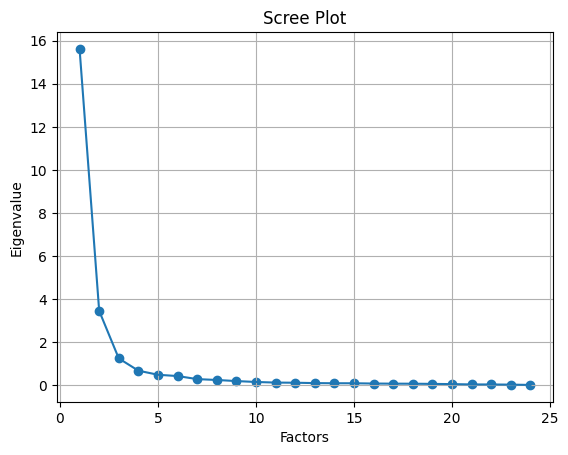

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

##Step3. Factor Analysis

###Factor : 3

In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation = "promax")
fa.fit(data_scale)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:4], 
                    columns = ['Factor1','Factor2','Factor3'], 
                    index = data_scale.index)
X_ff

,Factor1,Factor2,Factor3
기준일ID,,,
20220101,0.131469,-2.394581,-1.981415
20220102,-0.570421,-1.689958,-1.567652
20220103,-0.801105,-1.018136,-0.642080
20220104,-0.921964,-0.365730,-0.912768
20220105,-1.324459,-1.352974,-1.490664
...,...,...,...
20221227,-0.568547,0.495440,0.321346
20221228,-0.488815,0.904902,1.455680
20221229,-0.141391,1.368467,1.400998


<Axes: ylabel='시간대구분'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.ca

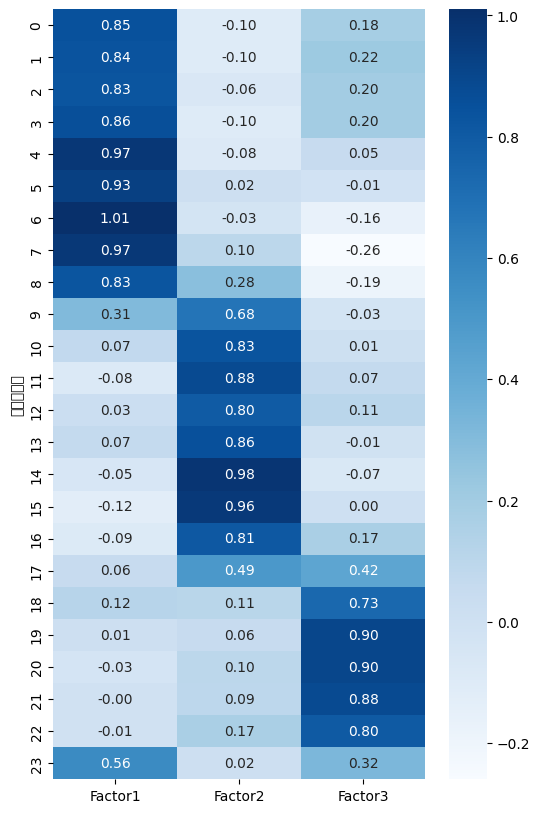

In [ ]:
# 시각화 1)
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=data_scale.columns)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: ylabel='시간대구분'>

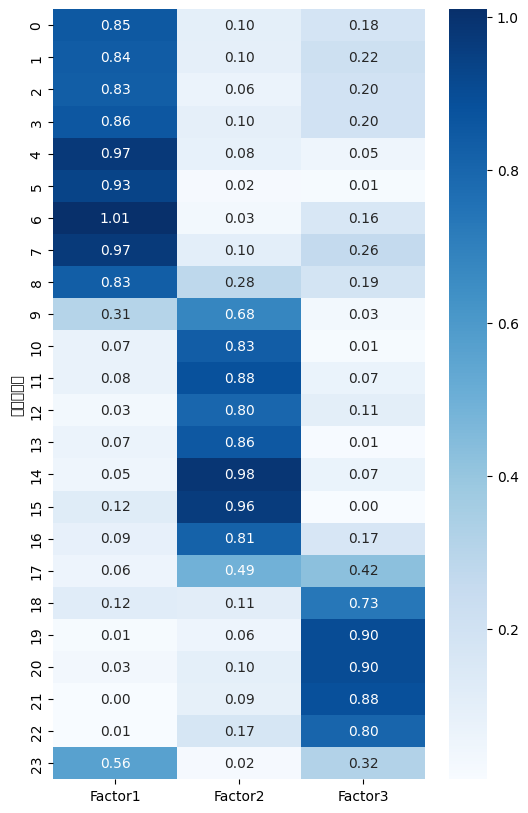

In [ ]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

#3. Clustering


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(X_ff)
scaled = pd.DataFrame(scaled, columns = X_ff.columns)
scaled.describe() # 기초통계량

,Factor1,Factor2,Factor3
count,3.650000e+02,3.650000e+02,3.650000e+02
mean,1.946692e-16,1.946692e-17,2.238696e-16
std,1.001373e+00,1.001373e+00,1.001373e+00
min,-1.875860e+00,-4.786520e+00,-3.761192e+00
25%,-8.060889e-01,-5.836341e-01,-7.263512e-01
50%,-1.506522e-01,6.220583e-02,3.658658e-02
75%,7.522273e-01,6.579676e-01,7.155099e-01
max,4.984872e+00,2.671082e+00,3.335836e+00


##Ward's linkage method

### Step 1. 거리 계산에 따른 클러스터링


In [ ]:
data_prime = scaled.copy()

In [ ]:
# used ward's linkeage
# used euclidean distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='ward', metric='euclidean')

### Step 2. 군집 수 결정

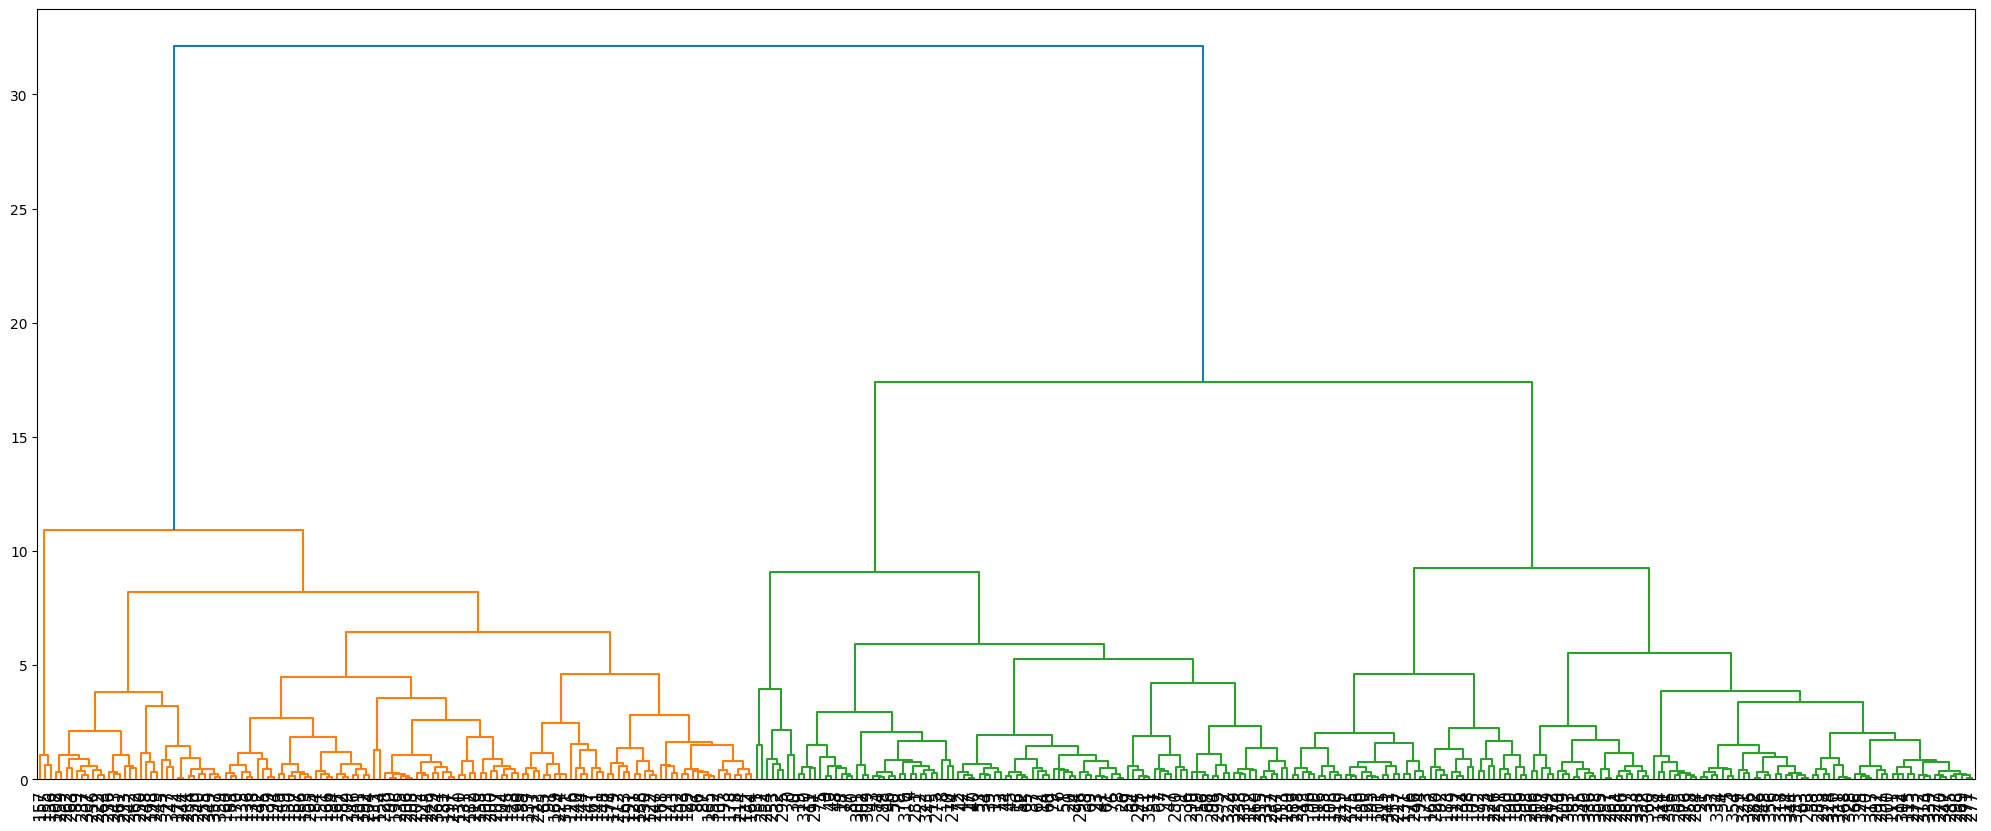

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=19, criterion='distance')
cut_tree

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
pd.Series(cut_tree).value_counts()

2    230
1    135
dtype: int64

### Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.40402041 0.51951474 0.58080364 0.58482941 0.54963706] 
Silhouette Score shape: (365,) 

Silhouette Average Score:0.404


In [ ]:
fa_result_loading.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='시간대구분')

In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime['date'] = X_ff.index
data_prime

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,0.132648,-2.431329,-2.007578,2,0.404020,20220101
1,-0.575537,-1.715892,-1.588351,2,0.519515,20220102
2,-0.808291,-1.033760,-0.650558,2,0.580804,20220103
3,-0.930234,-0.371342,-0.924820,2,0.584829,20220104
4,-1.336339,-1.373737,-1.510347,2,0.549637,20220105
...,...,...,...,...,...,...
360,-0.573646,0.503043,0.325589,2,0.106118,20221227
361,-0.493200,0.918788,1.474901,1,0.334098,20221228
362,-0.142659,1.389468,1.419497,1,0.451578,20221229
363,-0.025300,0.576459,0.857513,1,0.346504,20221230


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.465594
2    0.367096
Name: silhouette_coeff, dtype: float64
표준편차: 0.06964911639375214


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
# 군집별 통계(평균)
cluster_g.mean()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,0.887579,0.863604,0.934955,0.465594,2.022069e+07
2,-0.520970,-0.506898,-0.548778,0.367096,2.022066e+07


In [ ]:
# 군집별 통계(표준편차)
cluster_g.std()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,0.854130,0.596795,0.610933,0.130653,233.209980
2,0.655728,0.829299,0.746786,0.238041,396.759841


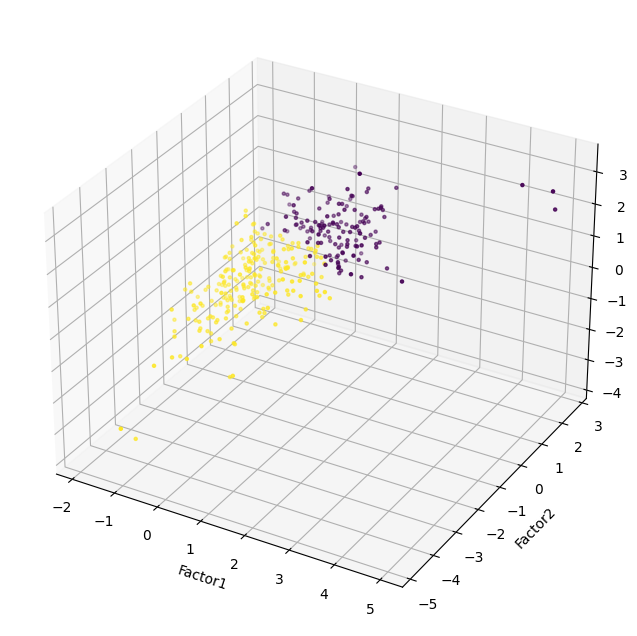

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_prime['Factor1'], data_prime['Factor2'], data_prime['Factor3'], s=5, c = data_prime['hc_cluster'])
ax.set_xlabel('Factor1', rotation=150)
ax.set_ylabel('Factor2')
ax.set_zlabel(r'Factor3', rotation=60)
plt.show()

In [ ]:
cluster1 = data_prime[data_prime['hc_cluster'] == 1]
cluster2 = data_prime[data_prime['hc_cluster'] == 2]

In [ ]:
cluster1

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
27,-0.951910,0.812577,0.256147,1,-0.129184,20220128
82,1.259702,0.756236,1.144152,1,0.613180,20220324
83,1.419745,1.612035,1.369675,1,0.589912,20220325
84,1.452121,0.826426,0.853908,1,0.595443,20220326
85,1.102183,-0.238047,0.771970,1,0.354065,20220327
...,...,...,...,...,...,...
359,0.014152,1.147887,0.368552,1,0.345664,20221226
361,-0.493200,0.918788,1.474901,1,0.334098,20221228
362,-0.142659,1.389468,1.419497,1,0.451578,20221229
363,-0.025300,0.576459,0.857513,1,0.346504,20221230


In [ ]:
cluster2

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,0.132648,-2.431329,-2.007578,2,0.404020,20220101
1,-0.575537,-1.715892,-1.588351,2,0.519515,20220102
2,-0.808291,-1.033760,-0.650558,2,0.580804,20220103
3,-0.930234,-0.371342,-0.924820,2,0.584829,20220104
4,-1.336339,-1.373737,-1.510347,2,0.549637,20220105
...,...,...,...,...,...,...
354,-0.446733,-0.456562,-0.979450,2,0.562624,20221221
355,-0.250625,0.924404,-0.700786,2,0.178860,20221222
356,-0.237855,-0.064896,-0.767350,2,0.475275,20221223
358,-0.150652,0.460390,0.207275,2,0.002447,20221225


# 시각화

In [ ]:
pivot_22_itw = data_22_gr.pivot(index='기준일ID', columns='시간대구분', values='60세이상생활인구수')

In [ ]:
pivot_22_itw

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,6121.7334,5903.1228,5903.9858,5891.9026,5839.9278,5908.1771,5968.4860,5998.2732,5942.5830,5948.0740,...,6177.1096,6425.7266,6589.7944,6645.6609,6470.2319,6355.8344,6206.9168,6125.9627,6106.1250,5758.7526
20220102,5779.2440,5741.8950,5759.8520,5804.8893,5755.7762,5842.4599,5851.3631,5851.2187,6000.3722,6157.8937,...,6423.3536,6502.3814,6683.8036,6693.9626,6698.7161,6375.2536,6331.3564,6326.1765,6296.6358,5838.1918
20220103,5798.2564,5786.7964,5784.9999,5777.2899,5766.9403,5788.1835,5732.7707,5782.5622,5781.2493,6087.3097,...,6583.4516,6879.2992,6841.3883,6855.9776,6589.1758,6599.9270,6668.5583,6452.3636,6435.9685,5852.1865
20220104,5757.5029,5727.0570,5714.6379,5706.3700,5720.5593,5806.6064,5742.4716,5752.6585,5927.2863,6102.6270,...,6725.2377,6972.2339,7099.3438,7182.9664,6769.3061,6577.7066,6446.2096,6419.8617,6389.7909,5738.8507
20220105,5701.5624,5662.7315,5640.0223,5675.6402,5722.8056,5709.0196,5587.2517,5726.7871,5775.5869,6096.8244,...,6575.9469,6654.5682,6727.1015,6741.9910,6460.3957,6467.3803,6357.7828,6333.2722,6290.4599,5793.5191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,5767.8851,5832.4081,5835.8204,5848.6489,5752.3038,5804.9492,5705.2849,5868.4426,6010.9111,6414.7168,...,7040.6622,7054.6021,7144.0866,7030.4817,6873.8388,7063.9105,6845.9226,6588.3507,6499.3464,5825.0032
20221228,5865.5194,5872.0560,5888.7310,5859.1092,5762.4251,5795.1713,5724.4762,5872.8270,5923.7173,6469.0875,...,7002.3410,7342.1850,7269.0842,7341.2739,7106.7138,7199.6296,6930.7483,7040.3008,6664.3535,5894.6044
20221229,5906.1621,5903.2648,5942.9466,5862.9344,5805.0673,5881.3058,5836.4356,5906.0474,5916.6161,6506.4206,...,7141.1560,7237.0753,7333.1619,7306.1590,7161.4918,7281.6779,7068.2683,6785.1010,6728.5953,5978.4029


## cluster1~3


In [ ]:
cluster1

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
27,-0.951910,0.812577,0.256147,1,-0.129184,20220128
82,1.259702,0.756236,1.144152,1,0.613180,20220324
83,1.419745,1.612035,1.369675,1,0.589912,20220325
84,1.452121,0.826426,0.853908,1,0.595443,20220326
85,1.102183,-0.238047,0.771970,1,0.354065,20220327
...,...,...,...,...,...,...
359,0.014152,1.147887,0.368552,1,0.345664,20221226
361,-0.493200,0.918788,1.474901,1,0.334098,20221228
362,-0.142659,1.389468,1.419497,1,0.451578,20221229
363,-0.025300,0.576459,0.857513,1,0.346504,20221230


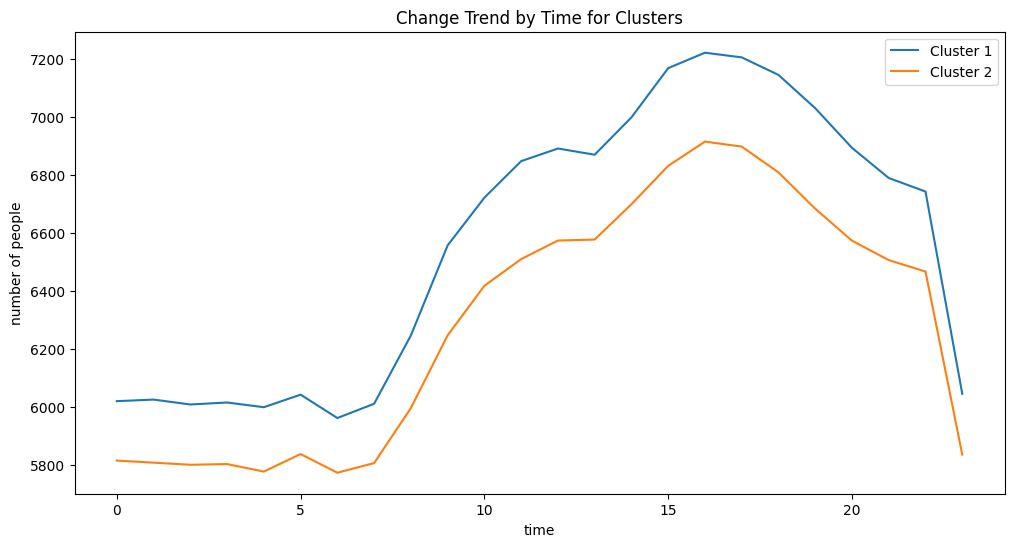

In [ ]:
import matplotlib.pyplot as plt

time_range = range(24)

#cluster1부터 5까지의 데이터와 날짜들 추출
clusters = [cluster1, cluster2, cluster3]
cluster_labels = ['Cluster 1', 'Cluster 2']
cluster_dates = [cluster['date'] for cluster in clusters]
cluster_data = [pivot_22_itw.loc[dates] for dates in cluster_dates]

#그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for label, data in zip(cluster_labels, cluster_data):
  change_trend = data.mean()
  ax.plot(time_range, change_trend, label=label)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Clusters')
ax.legend(loc='upper right')
plt.show()

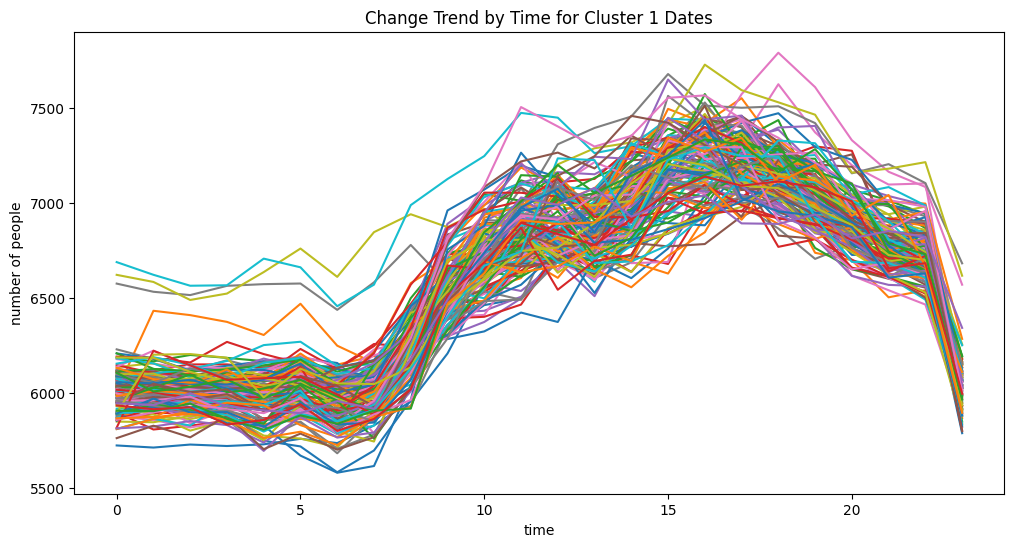

In [ ]:
import matplotlib.pyplot as plt

# cluster1에 해당하는 날짜들 추출
cluster1_dates = cluster1['date']

# pivot_22_itw에서 cluster1에 해당하는 날짜들의 데이터 추출
cluster1_data = pivot_22_itw.loc[cluster1_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster1_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 1 Dates')
plt.show()

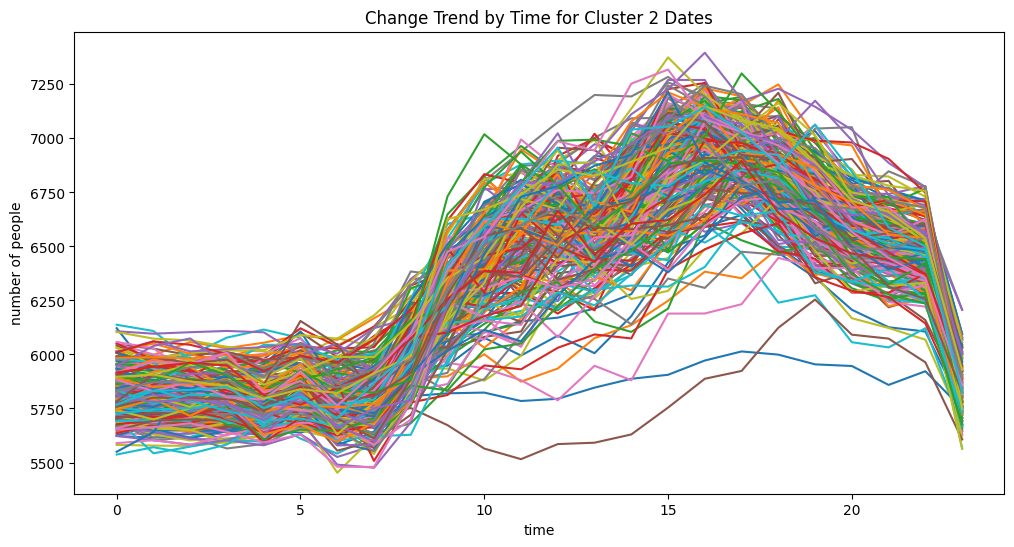

In [ ]:
import matplotlib.pyplot as plt

# cluster2에 해당하는 날짜들 추출
cluster2_dates = cluster2['date']

# pivot_22_itw에서 cluster3에 해당하는 날짜들의 데이터 추출
cluster2_data = pivot_22_itw.loc[cluster2_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster2_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 2 Dates')
plt.show()

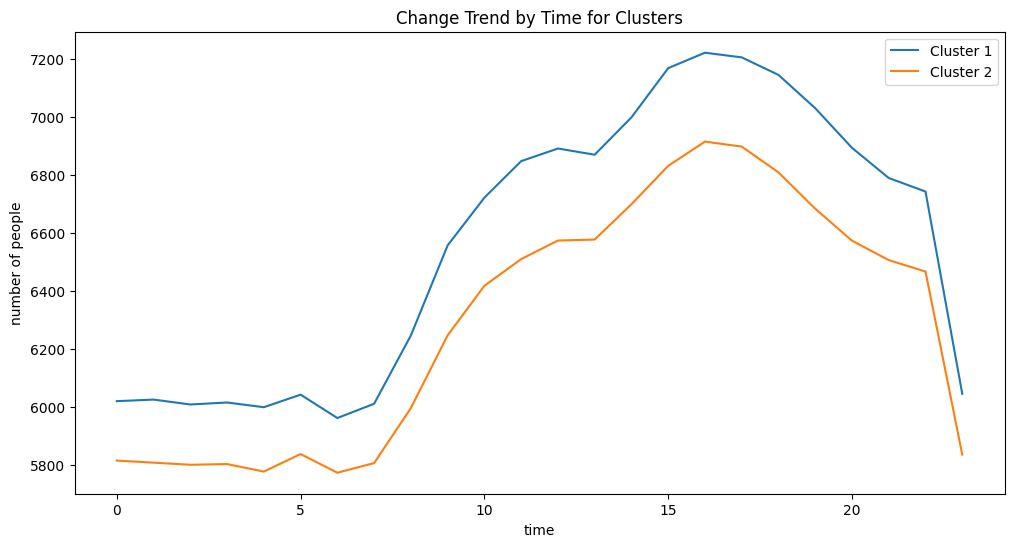

In [ ]:
import matplotlib.pyplot as plt

time_range = range(24)

#cluster1부터 5까지의 데이터와 날짜들 추출
clusters = [cluster1, cluster2]
cluster_labels = ['Cluster 1', 'Cluster 2']
cluster_dates = [cluster['date'] for cluster in clusters]
cluster_data = [pivot_22_itw.loc[dates] for dates in cluster_dates]

#그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for label, data in zip(cluster_labels, cluster_data):
  change_trend = data.mean()
  ax.plot(time_range, change_trend, label=label)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Clusters')
ax.legend(loc='upper right')
plt.show()

In [ ]:
pd.DataFrame(cluster1['date']) #일요일, 명절, 공휴일 등

,date
27,20220128
82,20220324
83,20220325
84,20220326
85,20220327
...,...
359,20221226
361,20221228
362,20221229
363,20221230


In [ ]:
pd.DataFrame(cluster2['date'])

,date
0,20220101
1,20220102
2,20220103
3,20220104
4,20220105
...,...
354,20221221
355,20221222
356,20221223
358,20221225


In [ ]:
data_22_gr_

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
295,20220101,0,11305535,21009.4757,392.0636,262.9869,419.0573,795.5370,891.6959,688.8383,...,895.4358,632.7947,707.0731,536.1652,778.1056,832.6464,1012.5098,850.5806,753.8108,2002.4265
598,20220101,1,11305535,20364.9769,404.5079,271.3349,407.0984,759.1762,872.0068,676.1915,...,898.1238,632.5021,672.5011,504.5344,747.0769,765.8386,989.2474,778.5579,698.0797,1946.4827
1252,20220101,2,11305535,20347.1077,397.7781,266.8197,410.3285,753.9758,898.2908,682.2993,...,888.1057,648.4554,665.2551,510.3161,728.2020,771.9031,959.2724,777.3097,685.4833,1947.5324
1323,20220101,3,11305535,20360.8512,413.3475,277.2641,407.9424,748.4042,889.3018,665.4473,...,906.9513,640.3178,669.2915,513.5474,722.1008,758.1028,964.9098,791.9194,674.3739,1948.9346
1742,20220101,4,11305535,20399.8000,402.9838,270.3119,431.9831,750.9239,922.1191,663.4354,...,898.3755,653.3711,677.8110,490.3707,741.2234,755.8430,987.0271,792.6009,673.4555,1935.5035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712461,20221231,19,11305535,24183.3136,520.8885,349.3998,505.6879,750.7123,1128.3544,737.1094,...,915.9680,718.2199,697.5830,670.2988,925.6726,936.2950,1183.8076,950.6633,865.0518,2141.9517
3712569,20221231,20,11305535,23838.8460,473.3394,317.5048,485.7731,740.5482,1104.3377,725.6371,...,890.1562,689.5917,766.1551,694.2402,899.9700,920.2579,1198.1300,951.0041,859.5785,2121.3507
3712988,20221231,21,11305535,23898.5066,499.4320,335.0068,488.9539,704.2341,1114.1959,788.9146,...,924.1113,685.5533,746.6339,654.8413,869.2530,955.3356,1186.4306,974.0585,878.6775,2079.1357
3713407,20221231,22,11305535,23873.3753,437.2450,293.2936,488.3179,720.6326,1144.6928,776.8756,...,985.0813,732.3078,781.4464,648.5536,887.5948,953.8837,1169.9449,978.2037,873.8890,2116.4264


In [ ]:
data_22_gr.columns

Index(['기준일ID', '시간대구분', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자70세이상생활인구수',
       '60세이상생활인구수'],
      dtype='object')

In [ ]:
data_22_gr

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
295,20220101,0,850.5806,753.8108,738.9050,493.7125,1282.2980,2002.4265,6121.7334
598,20220101,1,778.5579,698.0797,744.4155,481.5033,1254.0837,1946.4827,5903.1228
1252,20220101,2,777.3097,685.4833,749.4362,474.7638,1269.4604,1947.5324,5903.9858
1323,20220101,3,791.9194,674.3739,746.0822,472.9704,1257.6221,1948.9346,5891.9026
1742,20220101,4,792.6009,673.4555,728.1061,474.9919,1235.2699,1935.5035,5839.9278
...,...,...,...,...,...,...,...,...,...
3712461,20221231,19,950.6633,865.0518,906.6329,696.8077,1377.0242,2141.9517,6938.1316
3712569,20221231,20,951.0041,859.5785,897.0431,671.3787,1312.3144,2121.3507,6812.6695
3712988,20221231,21,974.0585,878.6775,928.0663,657.6481,1333.4231,2079.1357,6851.0092
3713407,20221231,22,978.2037,873.8890,908.5326,677.3126,1265.7318,2116.4264,6820.0961


In [ ]:
pivot_22_gr2 = data_22_gr.pivot(index='시간대구분', columns='기준일ID', values='60세이상생활인구수')


In [ ]:
pivot_22_gr2

기준일ID,20220101,20220102,20220103,20220104,20220105,20220106,20220107,20220108,20220109,20220110,...,20221222,20221223,20221224,20221225,20221226,20221227,20221228,20221229,20221230,20221231
시간대구분,,,,,,,,,,,,,,,,,,,,,
0,6121.7334,5779.2440,5798.2564,5757.5029,5701.5624,5825.6350,5631.7086,5761.8824,5670.3736,5697.6174,...,5882.5979,5831.9106,5891.3545,5896.6125,5890.4287,5767.8851,5865.5194,5906.1621,5933.5939,5944.8601
1,5903.1228,5741.8950,5786.7964,5727.0570,5662.7315,5751.1287,5634.2110,5735.2638,5645.9061,5731.8752,...,5829.6425,5872.3946,5907.2524,5906.9683,5968.8990,5832.4081,5872.0560,5903.2648,5913.4884,5935.6059
2,5903.9858,5759.8520,5784.9999,5714.6379,5640.0223,5765.1716,5650.7200,5743.3883,5647.9621,5661.7056,...,5876.2285,5869.4959,5919.9751,5875.2569,5896.5219,5835.8204,5888.7310,5942.9466,5923.3222,5997.2915
3,5891.9026,5804.8893,5777.2899,5706.3700,5675.6402,5777.2397,5625.3368,5716.7738,5588.7609,5688.9764,...,5801.7976,5881.4807,5882.1001,5854.8599,5898.0795,5848.6489,5859.1092,5862.9344,5832.3439,5928.8496
4,5839.9278,5755.7762,5766.9403,5720.5593,5722.8056,5826.8196,5722.0162,5794.8332,5609.3919,5650.1664,...,5791.3686,5797.9126,5795.7565,5795.8723,5820.3144,5752.3038,5762.4251,5805.0673,5856.7251,5907.2760
5,5908.1771,5842.4599,5788.1835,5806.6064,5709.0196,5837.1364,5741.3021,5849.2158,5710.9998,5763.6486,...,5921.4918,5860.3217,5888.0408,5839.4375,5947.8747,5804.9492,5795.1713,5881.3058,5939.0871,5892.8120
6,5968.4860,5851.3631,5732.7707,5742.4716,5587.2517,5889.6854,5610.0666,5774.8412,5795.4948,5714.7057,...,5763.5008,5847.7973,5849.4452,5821.9908,5832.8249,5705.2849,5724.4762,5836.4356,5799.7848,5956.0536
7,5998.2732,5851.2187,5782.5622,5752.6585,5726.7871,5802.7871,5747.9695,5907.8816,5802.5774,5749.2435,...,5915.6347,5900.1513,5908.7820,5912.8850,5843.2590,5868.4426,5872.8270,5906.0474,5861.9371,5915.8775
8,5942.5830,6000.3722,5781.2493,5927.2863,5775.5869,6049.2725,5866.0154,5939.0525,5928.9544,5946.1588,...,6096.3264,5975.3421,6127.8320,5992.1165,6068.3228,6010.9111,5923.7173,5916.6161,6018.6741,6173.8073


In [ ]:
date_3 = cluster1['date']

clu3_date = pivot_22_gr2[pivot_22_gr2.iloc[:, 0:].isin(pivot_22_gr2[date_3])]
clu3_date = clu3_date.dropna(axis=1) 
max_values2 = clu3_date.max()
max_indices2= clu3_date.idxmax()
result = pd.DataFrame({'생황인구 최댓값': max_values2, '시간': max_indices2})
Clu3_mean = result['시간'].mean()
Clu3_mean

16.22962962962963